# Data 422

Data Wrangling, S2 2019

## Assignement 2

### 20% of final grade

## Due date: 1pm Tuesday 1 October 2019

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own pair** (or group of three if we are odd) **work**. Avoid plagiarism: if you are not sure what may constitute code plagiarism, read this http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism. Remember, when in doubt **declare your sources**.  
As a general rule, late submission are **highly** unsuggested. The pace of the course is very quick, and you don't want to be working on this too long, as you would have less time for other assignments. I suggest you to submit what you have ready by the time the assignment is due, even if it is not everything we required. For any particular problem, please contact [Thomas Li](thomas.li@canterbury.ac.nz) or [Giulio Dalla Riva](giulio.dallariva@canterbury.ac.nz) or TAs.


## Instruction

### Total: 25 marks.

For this assignment you will work with data from the web. Your goal is to scrape it or request it, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter R notebook comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: better comments equal to better marks.  
You can either modify this notebook or write a new one from scratch.

### Assignment Submission by
### Anoop George Kariath       :39981737
### Dipin Ponthempilly Joseph  :72746678

## Comment, explain, present your work in a clear way (1 mark)

## R part (overall 19 marks)

Do use the tidyverse syntax that's introduced in class and labs. If in doubt, refresh the lab material 1 to 4.

### Task (a): scrape it (5 marks)

Identify a website page showing information you find interesting. The information should be presented across more than one page. Select one of this pages (the rest is for later) and using `rvest` (and the suit of `tidyverse` libraries we used so far, plus any other one you may need) get the html into R.

In [1]:
# your answer here
# Loading required libraries
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest) # rvest makes scraping easier
library(polite) # polite is the "polite" version of rvest
library(tidytext) # loading library tidytext to help with text analysis
library(textdata) # Loading library text data to get text related datasets like affin and stopwords

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract


Attaching package: ‘glue’

The following object is masked from ‘package:dplyr’:

    collapse

Loading required package: xml2

Attaching package: ‘rvest’

The following object is masked from ‘package:purrr’:

    pluck

The following object is masked from ‘package:readr’:

    guess_encoding



In [2]:
# The aim is to scrap movie inventory website - rottentomatoes.com
# Details of Top 100 action/adventure movies are collected and processed.
base_url <- "https://www.rottentomatoes.com"
home_url <- "https://www.rottentomatoes.com/top/bestofrt/top_100_action__adventure_movies/"
# Loading HTML data of webpage
page <- read_html(home_url)
#https://www.rottentomatoes.com/robots.txt --> to check scrapping rights

In [3]:
# Extracting URLs of each movie in Top 100 
# Reference - https://stackoverflow.com/a/32128185/6903724
child_urls <- page %>%
  html_nodes(".table") %>%
  html_nodes("td") %>%
  html_nodes("a") %>%
  html_attrs() %>%
  map_chr("href")

# Appending relative URLs with base URL
#https://stackoverflow.com/a/6984831/6903724
child_urls <- paste(base_url, child_urls, sep="")
child_urls %>%
  head()

[1] "https://www.rottentomatoes.com/m/black_panther_2018"     
[2] "https://www.rottentomatoes.com/m/mad_max_fury_road"      
[3] "https://www.rottentomatoes.com/m/wonder_woman_2017"      
[4] "https://www.rottentomatoes.com/m/coco_2017"              
[5] "https://www.rottentomatoes.com/m/dunkirk_2017"           
[6] "https://www.rottentomatoes.com/m/star_wars_the_last_jedi"

In [4]:
# Extracting all tables present in webpage
# Reference - https://stackoverflow.com/a/32401431/6903724
tables_all <- page %>%
  html_table(fill=TRUE) 
tables_all[3]

# Converting required table to dataframe
df_home <- data.frame(tables_all[3])
df_home %>%
  head()

Rank,RatingTomatometer,Title,No. of Reviews
<dbl>,<chr>,<chr>,<int>
1,97%,Black Panther (2018),486
2,97%,Mad Max: Fury Road (2015),408
3,93%,Wonder Woman (2017),437
4,97%,Coco (2017),329
5,92%,Dunkirk (2017),437
6,91%,Star Wars: The Last Jedi (2017),452
7,93%,Thor: Ragnarok (2017),400
8,93%,Logan (2017),395
9,98%,Metropolis (1927),124


Rank,RatingTomatometer,Title,No..of.Reviews
<dbl>,<chr>,<chr>,<int>
1,97%,Black Panther (2018),486
2,97%,Mad Max: Fury Road (2015),408
3,93%,Wonder Woman (2017),437
4,97%,Coco (2017),329
5,92%,Dunkirk (2017),437
6,91%,Star Wars: The Last Jedi (2017),452


### Task (b): wrangle it (5 marks)


Working on the page from task (a), transform the data you collected into relational data model (that is, one or more data frames). WARNING: you will need to think and motivate how you are doing this in terms of the **data model** you are trying to build; just throwing everything in a table is not enough.

In [5]:
# your answer here
# Adding movie URLs as a column in dataframe
df_home["URLs"] <- child_urls
df_home %>%
  head()

Rank,RatingTomatometer,Title,No..of.Reviews,URLs
<dbl>,<chr>,<chr>,<int>,<chr>
1,97%,Black Panther (2018),486,https://www.rottentomatoes.com/m/black_panther_2018
2,97%,Mad Max: Fury Road (2015),408,https://www.rottentomatoes.com/m/mad_max_fury_road
3,93%,Wonder Woman (2017),437,https://www.rottentomatoes.com/m/wonder_woman_2017
4,97%,Coco (2017),329,https://www.rottentomatoes.com/m/coco_2017
5,92%,Dunkirk (2017),437,https://www.rottentomatoes.com/m/dunkirk_2017
6,91%,Star Wars: The Last Jedi (2017),452,https://www.rottentomatoes.com/m/star_wars_the_last_jedi


In [6]:
# Converting Ratings, from percentage to scale on 10.
rating_parser <- function(rating){
    # Reference - https://stackoverflow.com/a/14718251/6903724
    rating <- gsub("%", "", as.character(factor(rating))) %>%
        as.numeric()
    rating <- rating/10
}
df_home$RatingTomatometer <- sapply(df_home$RatingTomatometer, rating_parser)

# Extracting year from Title and created as new column
# Reference - https://stackoverflow.com/a/36993118/6903724
df_home$year <- str_sub(df_home$Title,-5,-2) %>%
    as.numeric()
df_home %>%
  head()

Rank,RatingTomatometer,Title,No..of.Reviews,URLs,year
<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>
1,9.7,Black Panther (2018),486,https://www.rottentomatoes.com/m/black_panther_2018,2018
2,9.7,Mad Max: Fury Road (2015),408,https://www.rottentomatoes.com/m/mad_max_fury_road,2015
3,9.3,Wonder Woman (2017),437,https://www.rottentomatoes.com/m/wonder_woman_2017,2017
4,9.7,Coco (2017),329,https://www.rottentomatoes.com/m/coco_2017,2017
5,9.2,Dunkirk (2017),437,https://www.rottentomatoes.com/m/dunkirk_2017,2017
6,9.1,Star Wars: The Last Jedi (2017),452,https://www.rottentomatoes.com/m/star_wars_the_last_jedi,2017


In [7]:
# Function to extract details from child URLs
child_extractor <- function(child_url){
    
    # Saving HTML to variable 
    page_data <- child_url %>%
    read_html()
    
    # Extracting required elements from page data
    data <- page_data %>%
    html_nodes(".content-meta.info") %>%
    html_nodes(".meta-value") %>%
    html_text() 
    
    # we do a sanity check to see that there's something inside the data!
    stopifnot(length(data) > 0)
    
    # Extraction of each feature value
    revenue <- as.numeric(gsub("[^\\d]+", "", data[7], perl=TRUE))
    duration <- as.numeric(gsub("[^\\d]+", "", data[8], perl=TRUE))
    director <- str_trim(data[3])
    studio <- str_trim(data[9])
    release <- str_trim(gsub("wide", "", str_trim(data[5])))
    
    movie <- page_data %>%
    html_nodes(".mop-ratings-wrap__title.mop-ratings-wrap__title--top") %>%
    html_text() 
    
    # Retreival of Critic reviews and User reviews
    critic_reviews <- page_data %>%
    html_nodes(".review_quote") %>%
    html_nodes(".quote_bubble__quote") %>%
    html_nodes("p") %>%
    html_text() %>%
    str_trim()
    
    critic_reviews <- paste(critic_reviews, collapse = '')
    
    user_reviews <- page_data %>%
    html_nodes(".mop-audience-reviews__review--comment") %>%
    html_text() %>%
    str_trim()
    
    user_reviews <- paste(user_reviews, collapse = '')
    
    # Construction of dataframe with details obtained
    df_child <- tibble(Movie=movie,"Revenue in $"=revenue, Duration=duration, Studio=studio, 
                           "Release Date"= release, Director=director, "User Reviews"=user_reviews, 
                           "Critic Reviews"=critic_reviews)
    # 1s second delay between calls for safe scraping
    Sys.sleep(1)
    return (df_child)
}

In [9]:
# Using sapply, run function for all URLs
df_child <- sapply(df_home$URLs, child_extractor)
df_child_t <- as_tibble(t(df_child))
# Removing row labels
# Reference - https://stackoverflow.com/a/27806963/6903724
row.names(df_child_t) <- NULL
df_child_t %>%
    glimpse()

Observations: 100
Variables: 8
$ Movie            <list> ["Black Panther", "Mad Max: Fury Road", "Wonder Wom…
$ `Revenue in $`   <list> [501105037, 129483877, 412400625, 208487719, 188042…
$ Duration         <list> [135, 120, 141, 109, 107, 152, 130, 135, 115, NA, N…
$ Studio           <list> ["Marvel Studios", "Warner Bros.", "Warner Bros. Pi…
$ `Release Date`   <list> ["Feb 16, 2018", "May 15, 2015", "Jun 2, 2017", "No…
$ Director         <list> ["Ryan Coogler", "George Miller", "Patty Jenkins", …
$ `User Reviews`   <list> ["This movie lived up to its hype. It's possibly on…
$ `Critic Reviews` <list> ["\"Black Panther\" lived up to the hype.When it co…


In [10]:
df_child_t %>% head() #displaying dataframe with details of child links

Movie                    Revenue in $ Duration Studio               
1 Black Panther            501105037    135      Marvel Studios       
2 Mad Max: Fury Road       129483877    120      Warner Bros.         
3 Wonder Woman             412400625    141      Warner Bros. Pictures
4 Coco                     208487719    109      Disney/Pixar         
5 Dunkirk                  188042171    107      Warner Bros. Pictures
6 Star Wars: The Last Jedi 619117636    152      Walt Disney Pictures 
  Release Date
1 Feb 16, 2018
2 May 15, 2015
3 Jun 2, 2017 
4 Nov 22, 2017
5 Jul 21, 2017
6 Dec 15, 2017
  Director                                                                                   
1 Ryan Coogler                                                                               
2 George Miller                                                                              
3 Patty Jenkins                                                                              
4 Lee Unkrich, \n                             \n                                Adrian Molina
5 Christopher Nolan                                                                          
6 Rian Johnson                                                                               
  User Reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

### Task (c): automate it (5 marks)

Now it's the time to scrape everything else in the website. Turn your code for tasks (a) and (b) into a function and using `purrr` (and its `map_` functions, possibly in combination with `possibly`) apply that function to all the pages you are interested in (as we have done in lab 6); the output of the task should be a relation dataset (i.e., one or more dataframes, and if more than one, explicit their relationships).

In [11]:
# your answer here
# Function to extract details from movie name
child_extractor_input <- function(movie_name){
    
    # Rearranging movie name to format in URLs
    collapsed_name <- str_replace_all(movie_name, " ", "_")
    child_url <- glue("https://www.rottentomatoes.com/m/{collapsed_name}")
    
    # Saving HTML to variable 
    page_data <- child_url %>%
    read_html()
    
    # Extracting required elements from page data
    data <- page_data %>%
    html_nodes(".content-meta.info") %>%
    html_nodes(".meta-value") %>%
    html_text() 
    
    # we do a sanity check to see that there's something inside the data!
    stopifnot(length(data) > 0)
    
    # Extraction of each feature value
    revenue <- as.numeric(gsub("[^\\d]+", "", data[7], perl=TRUE))
    duration <- as.numeric(gsub("[^\\d]+", "", data[8], perl=TRUE))
    director <- str_trim(data[3])
    studio <- str_trim(data[9])
    release <- str_trim(gsub("wide", "", str_trim(data[5])))
    
    movie <- page_data %>%
    html_nodes(".mop-ratings-wrap__title.mop-ratings-wrap__title--top") %>%
    html_text() 
    
    # Retreival of Critic reviews and User reviews
    critic_reviews <- page_data %>%
    html_nodes(".review_quote") %>%
    html_nodes(".quote_bubble__quote") %>%
    html_nodes("p") %>%
    html_text() %>%
    str_trim()
    
    critic_reviews <- paste(critic_reviews, collapse = '')
    
    user_reviews <- page_data %>%
    html_nodes(".mop-audience-reviews__review--comment") %>%
    html_text() %>%
    str_trim()
    
    user_reviews <- paste(user_reviews, collapse = '')
    
    # Construction of dataframe with details obtained
    df_child <- tibble(Movie=movie,"Revenue in $"=revenue, Duration=duration, Studio=studio, 
                           "Release Date"= release, Director=director, "User Reviews"=user_reviews, 
                           "Critic Reviews"=critic_reviews)
    
    # 1s second delay between calls for safe scraping
    Sys.sleep(1)
    return (df_child)
}

In [12]:
# Safe wrapping of method to take care of NAs and exceptions.
child_extractor_safe <- purrr::possibly(.f = child_extractor_input, # the function that we want to make safer
                                   otherwise = NA_character_) # the value we get back if .f fails

# Data retrieval by movie name
df_child_extractor_input <- "Black Panther 2018" %>% 
    child_extractor_safe()
df_child_extractor_input

Movie,Revenue in $,Duration,Studio,Release Date,Director,User Reviews,Critic Reviews
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Black Panther,501105037,135,Marvel Studios,"Feb 16, 2018",Ryan Coogler,"This movie lived up to its hype. It's possibly one of the best films of its kind, and I especially liked the development of all the characters. The villain isn't just a villain. I understood him. Like all Marvel films, the visual and aural elements are excellent. Acting and writing are top notch here as well. This film is a bit more serious than most Marvel films, which works in its favor.t was about time we saw a Marvel superhero blockbuster starring mostly African-American actors and achieving the success and popularity that it did - and even better is how great it is, with a thrilling climax and relatable characters that compensate for a couple of flaws in the script.When it comes to Marvel films, I put this one right up there as one of the best. It has a great villain, great visuals, great performances, and a great narrative that tests the morals of every character. Coogler does a great high-wire balancing act managing a complex story while staying true to the comics, introducing new characters into the MCU, and making a strong social statement. I also enjoyed the struggle between T'challa and Killmonger being portrayed as less of a hero vs villain and more of one ideology vs another, both with its merits and flaws. I only wish Killmonger's violence and evil streak was toned down a bit to show off his better intentions and humanize him more, but there's so much to enjoy here that it doesn't become a huge issue. Impressive visuals, characters, and storylines come together to form a great film here.With a superb soundtrack and great performances from Michael B Jordan and Danai Gurira, this, for me, is the most enjoyable Marvel movie yet. With none of the forced humour it shows stronger storytelling instead which keeps you gripped until the end.","""Black Panther"" lived up to the hype.When it comes to creative visuals, engaging action and likable characters, ""Black Panther"" stands confidently next to the best fare offered up by the Marvel Cinematic Universe.Whether or not this is the best film Marvel Studios has made to date-and it is clearly in the discussion-it is by far the most thought-provoking.The identity politics provide a fresh spin to the genre's increasingly tedious narrative formula.If it isn't indisputably the best of Marvel's 18 offerings, it is certainly a contender.Jordan has swagger to spare, with those rolling shoulders, but there's a breath of charm, too, all the more seductive in the overblown atmosphere of Marvel. He's twice as pantherish as the Panther.Ultimately, Black Panther is more of the same.Hell, it borders on Shakespearean at times. And the final scene isn't the requisite pause before the next Marvel movie, but a genuine Moment. It's an emotionally rousing expression of why this movie matters, flaws and all.It's a powerful package.Black Panther is one of Marvel's best movies to date and Ryan Coogler has delivered something which is going to have a lasting impact not only on comic book fans but an entire generation. Wakanda Forever!Spectacular diversity magic! Black Panther slashes a lot of things, chiefly colonialism. In my childhood, I was force-fed history that 'Civilizations of color were less than superior.' NO MORE! The world needs this black superhero.The film is smart, fast paced and action-packed, with incredible production design, costuming, and special effects. More important, it showcases a superhero who is different than any before him."


In [13]:
afinn <-get_sentiments("afinn")#assigning positive and negative values from dictonary affin to variable affin

In [14]:
Review <- function(movie_df) {  #initializing function with parameter as movie_df containing details of a particular movie
user <- movie_df %>%
  unnest_tokens(word,"User Reviews")%>%
 anti_join(stop_words, by = "word") %>% #  anti-join function to remove dull words(stopwords) on column "word"
#  innerjoin function to stitch the scores from afinn to words in our "User Reviews".
 inner_join(afinn, by = "word") %>% # inner join on "word" column
group_by(word) %>% # Group by "word" for each user review
 summarise(Length = n(), # summarizing to reduce the all the rows in a dataframe into a single row
   Score = sum(value)/Length) %>% arrange(-Score) #calculating the score of words of "User Reviews" and arranging  in acending order
    critics <- movie_df %>%
  unnest_tokens(word,"Critic Reviews")%>%
 anti_join(stop_words, by = "word") %>% #  anti-join function to remove dull words(stopwords) on column "word"
# innerjoin function to stitch the scores from afinn to words in our "Critic Reviews".
 inner_join(afinn, by = "word") %>% #  inner join on "word" column
  group_by(word) %>% # Group by "word" for each critic review
 summarise(Length = n(), # summarizing to reduce the all the rows in a dataframe into a single row
   Score = sum(value)/Length) %>% arrange(-Score)#calculating the score of words of "Critic Reviews" and arranging  in acending order
    return(list("User Review Analysis"=user,"Critics Review Analysis"=critics))#returning a list containing dataframes of positive and negative words present in User Reviews and
    # Critic Reviews after assigning scores
    }

In [15]:
Review(df_child_extractor_input) #Testing output for movie loaded to dataframe df_child_extractor_input

word,Length,Score
<chr>,<int>,<dbl>
superb,1,5
blockbuster,1,3
excellent,1,3
impressive,1,3
marvel,5,3
enjoy,1,2
hero,1,2
humour,1,2
strong,1,2


In [21]:
"wonder woman" %>% 
    child_extractor_safe() %>% Review() #Reusable-flow function usage for analysing positivity and negativity of User and Critic Reviews

word,Length,Score
<chr>,<int>,<dbl>
fun,1,4
exciting,1,3
fan,1,3
fascinating,1,3
love,2,3
super,1,3
bold,1,2
boldly,1,2
entertaining,1,2


### Task (d): plot it (2 marks)

Use graphics (via `ggplot`) to represent the data you collected in a meaningful way.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message:
“Removed 2 rows containing non-finite values (stat_count).”

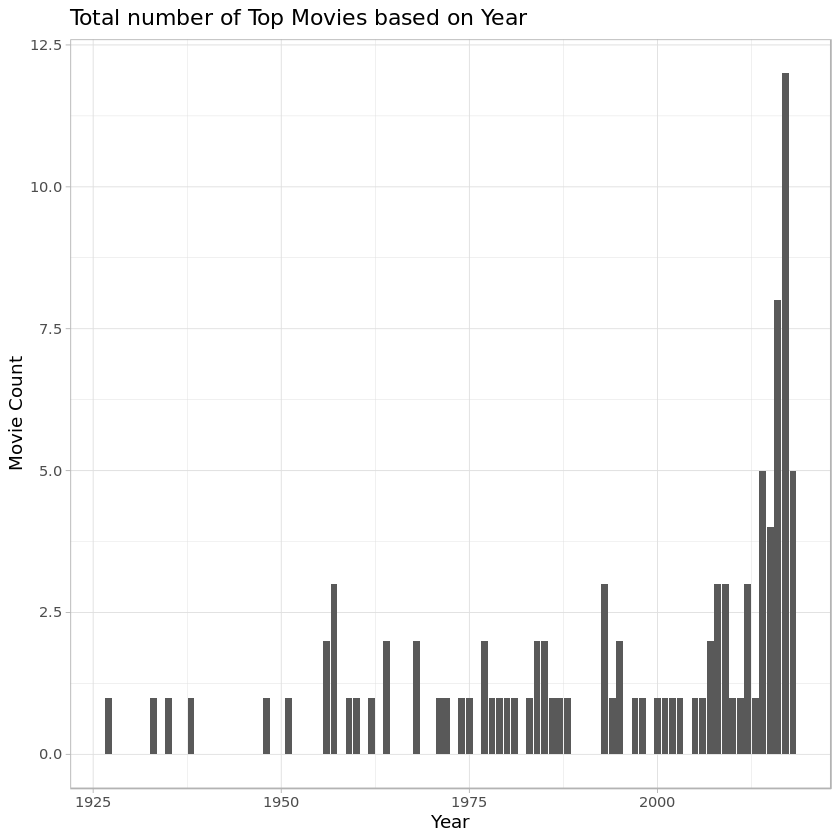

In [29]:
# your answer here
# Parsing year from Release Date
df_child_t$year <- (substring(df_child_t$`Release Date`,8,12))
# Generation histogram showing the top movie counts in relevant years
ggplot(df_child_t, aes(x = as.numeric(year))) + geom_histogram(stat="count")+
  labs(title="Total number of Top Movies based on Year",
       x="Year", y = "Movie Count")+
    theme_light()

### Task (e): APIs (2 marks)

Identify a web service offering data through an API. Access the API using `httr` and collect the information you care about. Convert the data into a dataframe (or more than one). Represent it graphically in a meaningful way.

In [23]:
# your answer here
# Loading required libraries
library(ggplot2)
library(dplyr)
library(jsonlite)
library(httr)


Attaching package: ‘jsonlite’

The following object is masked from ‘package:purrr’:

    flatten



In [24]:
# REST API endpoint provided by theaudiodb.com
# The particular API retrieves "The top 50 Most Loved Tracks of All time"
# No query params or authentication headers are required for this API
api_endpoint <- "https://theaudiodb.com/api/v1/json/1/mostloved.php?format=track&format=track"
# A GET call is requested and response saved in a variable
r <- GET(api_endpoint)

In [25]:
# Checking status code(200), headers of Response (type-json) and content
status_code(r)
headers(r)
content(r, "parse")

[1] 200

$`content-type`
[1] "application/json"

$server
[1] "Microsoft-IIS/7.0"

$`x-powered-by`
[1] "PHP/5.6.0"

$`x-powered-by`
[1] "ASP.NET"

$`access-control-allow-origin`
[1] "*"

$date
[1] "Mon, 30 Sep 2019 21:39:24 GMT"

$`content-length`
[1] "136276"

attr(,"class")
[1] "insensitive" "list"

$loved
$loved[[1]]
$loved[[1]]$idTrack
[1] "32752554"

$loved[[1]]$idAlbum
[1] "2112363"

$loved[[1]]$idArtist
[1] "111444"

$loved[[1]]$idLyric
[1] "119758"

$loved[[1]]$idIMVDB
[1] "2147483647"

$loved[[1]]$strTrack
[1] "Space Oddity"

$loved[[1]]$strAlbum
[1] "Space Oddity"

$loved[[1]]$strArtist
[1] "David Bowie"

$loved[[1]]$strArtistAlternate
NULL

$loved[[1]]$intCD
NULL

$loved[[1]]$intDuration
[1] "316333"

$loved[[1]]$strGenre
[1] "Rock"

$loved[[1]]$strMood
[1] "Weird"

$loved[[1]]$strStyle
[1] "Rock/Pop"

$loved[[1]]$strTheme
[1] "..."

$loved[[1]]$strDescription
[1] "\"Space Oddity\" is a song written and recorded by David Bowie. It was first released as a 7-inch single on 11 July 1969. It was also the opening track of his second studio album, David Bowie. It became one of Bowie's signature songs and one of four of his songs to be included in The Rock and Roll Hall of Fame's 500 Songs that Shaped Rock and Roll.\r\n\r\nInspired by Stanley Kubrick's film 2001: A Space Odyssey (1968), the song is about the launch of Major Tom, a fictional astronaut, and was released during a period of great interest in space flight. The United States' Apollo 11 mission would launch five days later and would become the first manned moon landing another five days after that. The lyrics have also been seen to lampoon the British space programme, which was and still is an unmanned project. Bowie would later revisit his Major Tom character in the songs \"Ashes to Ashes\", \"Hallo Spaceboy\" and possibly the music video for \"Blackstar\".\r\n\r\n\"Space Oddity\" was David Bowie's first single to chart in the UK. It reached the top five on its initial release and received the 1970 Ivor Novello Special Award for Originality. His second album, originally released as David Bowie in the UK, was renamed after the track for its 1972 re-release by RCA Records and became known by this name. In 1975, upon re-release as part of a maxi-single, the song became Bowie's first UK No. 1 single.\r\n\r\nIn December 1972, Mick Rock shot a video of Bowie miming to the June 1969 recording of the song, during the sessions for Aladdin Sane. The resulting music video was used to promote the 1973 US reissue of the \"Space Oddity\" single on RCA."

$loved[[1]]$strTrackThumb
[1] "https://www.theaudiodb.com/images/media/track/thumb/xsqwwq1569313472.jpg"

$loved[[1]]$strTrack3DCase
NULL

$loved[[1]]$strTrackLyrics
[1] ""

$loved[[1]]$strMusicVid
[1] "https://www.youtube.com/watch?v=iYYRH4apXDo"

$loved[[1]]$strMusicVidDirector
[1] "Mick Rock"

$loved[[1]]$strMusicVidCompany
[1] ""

$loved[[1]]$strMusicVidScreen1
NULL

$loved[[1]]$strMusicVidScreen2
NULL

$loved[[1]]$strMusicVidScreen3
NULL

$loved[[1]]$intMusicVidViews
[1] "41120998"

$loved[[1]]$intMusicVidLikes
[1] "343440"

$loved[[1]]$intMusicVidDislikes
[1] "9495"

$loved[[1]]$intMusicVidFavorites
[1] "0"

$loved[[1]]$intMusicVidComments
[1] "22973"

$loved[[1]]$intTrackNumber
[1] "1"

$loved[[1]]$intLoved
[1] "6"

$loved[[1]]$intScore
[1] "9.71429"

$loved[[1]]$intScoreVotes
[1] "7"

$loved[[1]]$intTotalListeners
[1] "698918"

$loved[[1]]$intTotalPlays
[1] "4365278"

$loved[[1]]$strMusicBrainzID
[1] "84649f3b-6da6-4da6-8e33-a7a990b69516"

$loved[[1]]$strMusicBrainzAlbumID
[1] "2e12918c-4973-3537-b9ab-e4723ae1ae1d"

$loved[[1]]$strMusicBrainzArtistID
[1] "5441c29d-3602-4898-b1a1-b77fa23b8e50"

$loved[[1]]$strLocked
[1] "unlocked"


$loved[[2]]
$loved[[2]]$idTrack
[1] "32723592"

$loved[[2]]$idAlbum
[1] "2109569"

$loved[[2]]$idArtist
[1] "111233"

$loved[[2]]$idLyric
[1] "178365"

$loved[[2]]$idIMVDB
[1] "0"

$loved[[2]]$strTrack
[1] "The Pretender"

$loved[[2]]$strAlbum
[1] "Echoes, Silence, Patience & Grace"

$loved[[2]]$strArtist
[1] "Foo Fighters"

$loved[[2]]$strArtistAlternate
[1] "The Foo Fighters"

$loved[[2]]$intCD
NULL

$loved[[2]]$intDuration
[1] "269373"

$loved[[2]]$strGenre
[1] "Alternative Rock"

$loved[[2]]$strMood
[1] "Energetic"

$loved[[2]]$strStyle
[1] "Rock/Pop"

$loved[[2]]$strTheme
[1] "..."


In [26]:
# Converting response contents from json to dataframe
df_audio <- fromJSON((content(r, "text")))
# Since the retrieved JSON structure is completed, workaround to get proper dataframe
df_audio <- df_audio$loved
df_audio %>%
    head()
df_audio %>%
    glimpse()

No encoding supplied: defaulting to UTF-8.


idTrack,idAlbum,idArtist,idLyric,idIMVDB,strTrack,strAlbum,strArtist,strArtistAlternate,intCD,⋯,intTrackNumber,intLoved,intScore,intScoreVotes,intTotalListeners,intTotalPlays,strMusicBrainzID,strMusicBrainzAlbumID,strMusicBrainzArtistID,strLocked
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
32752554,2112363,111444,119758,2147483647,Space Oddity,Space Oddity,David Bowie,NA,NA,⋯,1,6,9.71429,7,698918,4365278,84649f3b-6da6-4da6-8e33-a7a990b69516,2e12918c-4973-3537-b9ab-e4723ae1ae1d,5441c29d-3602-4898-b1a1-b77fa23b8e50,unlocked
32723592,2109569,111233,178365,0,The Pretender,"Echoes, Silence, Patience & Grace",Foo Fighters,The Foo Fighters,NA,⋯,1,6,9.5,10,1239804,10358451,ffb3f2b6-460d-4334-8221-c4912df88972,0ce4a1f2-7908-3865-8f19-08348546424a,67f66c07-6e61-4026-ade5-7e782fad3a5d,unlocked
34015736,2215925,117697,0,0,Happy,Girl,Pharrell Williams,Pharrell,NA,⋯,5,5,10,7,603725,5482522,f367ad6e-efd5-4496-aba5-21a4edcd82c6,b98397c3-76c8-4d00-8274-fbbc418bb99f,149f91ef-1287-46da-9a8e-87fee02f1471,unlocked
32982991,2131099,114415,0,0,Demons,Night Visions,Imagine Dragons,NA,NA,⋯,4,5,9.875,8,780452,7841752,87dede50-097f-4064-9a9b-bd4851363971,caef5f01-8568-4573-8458-c9e99ff7c734,012151a8-0f9a-44c9-997f-ebd68b5389f9,unlocked
32823000,2118223,112424,333117,2147483647,Billie Jean,Thriller,Michael Jackson,NA,NA,⋯,6,5,8.23077,13,1246105,7529099,cb052235-5107-4988-ac2f-10404025c663,f32fab67-77dd-3937-addc-9062e28e4c37,f27ec8db-af05-4f36-916e-3d57f91ecf5e,unlocked
32789330,2115556,111971,438687,0,She's So Lovely,Scouting for Girls,Scouting for Girls,NA,NA,⋯,2,5,10,4,200709,1014339,8e00ed20-0ce1-45b0-9c15-2501176672fd,08486f18-c068-31a8-8ed5-457fc83e60cf,854b0687-f9fc-4109-b59f-dbe84ebc5de6,unlocked


Observations: 50
Variables: 40
$ idTrack                <chr> "32752554", "32723592", "34015736", "32982991"…
$ idAlbum                <chr> "2112363", "2109569", "2215925", "2131099", "2…
$ idArtist               <chr> "111444", "111233", "117697", "114415", "11242…
$ idLyric                <chr> "119758", "178365", "0", "0", "333117", "43868…
$ idIMVDB                <chr> "2147483647", "0", "0", "0", "2147483647", "0"…
$ strTrack               <chr> "Space Oddity", "The Pretender", "Happy", "Dem…
$ strAlbum               <chr> "Space Oddity", "Echoes, Silence, Patience & G…
$ strArtist              <chr> "David Bowie", "Foo Fighters", "Pharrell Willi…
$ strArtistAlternate     <chr> NA, "The Foo Fighters", "Pharrell", NA, NA, NA…
$ intCD                  <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ intDuration            <chr> "316333", "269373", "233000", "177506", "29300…
$ strGenre               <chr> "Rock", "Alternative Rock", "Hip-Hop", "Indie"…
$ strMood            

In [27]:
# For plotting, changing needed columns to proper type(numeric)
df_audio$intTotalPlays <- as.numeric(as.character(df_audio$intTotalPlays))
df_audio$intTotalListeners <- as.numeric(as.character(df_audio$intTotalListeners))

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

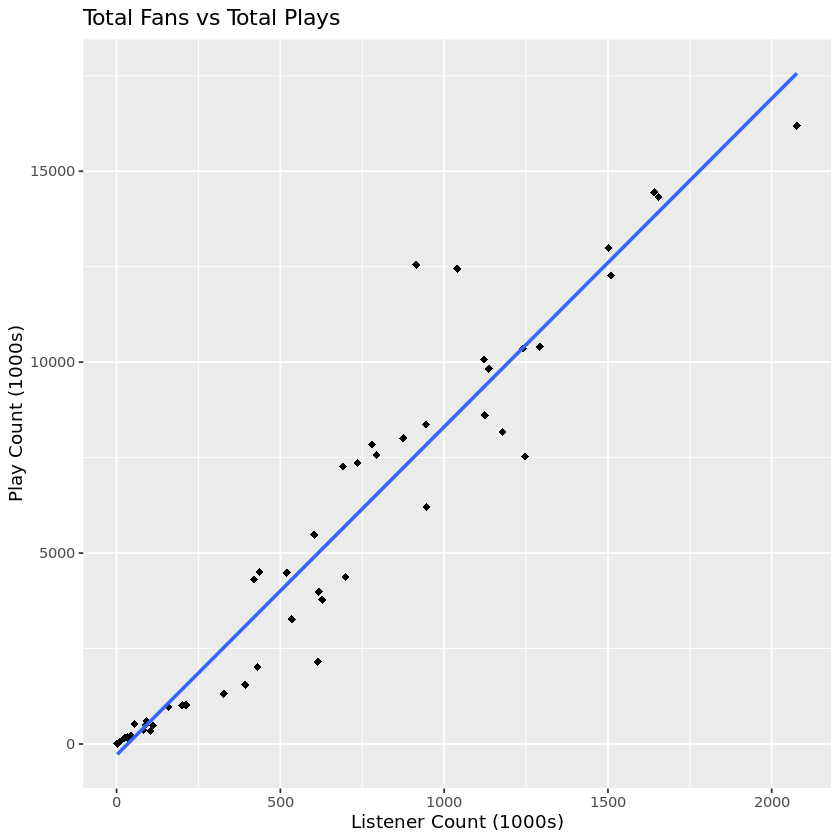

In [28]:
# Generating scatterplot to show linear relationship between no.of fans and no.of plays
# Source - http://www.sthda.com/english/wiki/ggplot2-scatter-plots-quick-start-guide-r-software-and-data-visualization
ggplot(df_audio, aes(x=intTotalListeners/1000, y=intTotalPlays/1000)) +
  labs(title="Total Fans vs Total Plays",
       x="Listener Count (1000s)", y = "Play Count (1000s)")+
  geom_point(size=2, shape=18) +
  # Adding linear regression Line
  geom_smooth(method=lm, se=FALSE)

## Julia part (5 marks)

Reproduce (at least part) of the scraping workflow you have done in R using Julia.

**you will need to do this in a new, separated notebook or in JuliaBox**

_hint_ this is the moment to go back to the Julia notebooks from the lab.